In [365]:
# this project is about Data Wrangling
# Gather "data"-> Assess "quality and structure"-> Clean "for analysis, visualization, build predictive models using ML"
# Data wrangling is a core skill that everyone who works with data should be familiar with since so much of 
# -the world's data isn't clean. Though this course is geared towards those who use Python to analyze data, 
# -the high-level concepts can be applied in all programming languages and software applications for data analysis.
# So wrangling means to round up, herd, or take charge of livestock, like horses or sheep. Let's focus in on the sheep example.
####################
# Dataset: The dataset you'll be wrangling is a dataset of 19,000 online job posts from 2004 to 2015 that were 
# -posted through an Armenian human resource portal. It is hosted on Kaggle, which is an extremely popular website 
# -for exploratory data analyses and machine learning competitions. The dataset is dirty and messy enough that you'll
# -have wrangling work to do, but also clean enough that it won't give you a headache.
####################
# Gather: Download The dataset used in this lesson is hosted on this Kaggle Datasets page: Armenian Online Job Postings. 
# -Some context on this dataset, from the description section of that page:
# -The online job market is a good indicator of overall demand for labor in an economy. 
# -This dataset consists of 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human resource portal.
####################
# Since postings are text documents and tend to have similar structures, text mining can be used to extract features 
# -like posting date, job title, company name, job description, salary, and more. Postings that had no structure 
# -or were not job-related were removed. The data was originally scraped from a Yahoo! mailing group.


In [366]:
import pandas as pd

In [367]:
#Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv('online-job-postings.csv')

In [368]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


- Missing values (NaN)
- StartDate inconsistences (ASAP)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

- Fix nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

In [370]:
# Display the first five rows of the DataFrame using .head
df.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [371]:
# Display the last five rows of the DataFrame using .tail
df.tail() #it displays the last 5 rows by default

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False
19000,"""Kamurj"" UCO CJSC\r\n\r\n\r\nTITLE: Lawyer in...","Dec 30, 2015",Lawyer in Legal Department,"""Kamurj"" UCO CJSC",NaN,Full-time,NaN,NaN,NaN,Indefinite,...,NaN,All qualified applicants are encouraged to\r\n...,30 December 2015,20 January 2016,NaN,"""Kamurj"" UCO CJSC is providing micro and small...",NaN,2015,12,False


In [372]:
# Display the entry counts for the Year column using .value_counts
df['Year'].value_counts()

2012    2149
2015    2009
2013    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

In [373]:
## Clean
#### Define
# Select all records in the StartDate column that hve "As soon as possible",
# and "Immediately", etc. and replace the text in those cells with "ASAP"

#### Code

In [374]:
df.StartDate

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
18996     NaN
18997    ASAP
18998    ASAP
18999     NaN
19000     NaN
Name: StartDate, Length: 19001, dtype: object

In [375]:
##Clean
#Define
#Select all nondescriptive and misspelled column headers 
#-(ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words 
#-(ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)
#-Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. 
#-and replace the text in those cells with "ASAP"
#Code

In [376]:
df_clean = df.copy()

In [377]:
#Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, 
#-JobRequirment) and replace them with full words 
#-(ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)

In [378]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure', 
                        'AboutC': 'AboutCompany', 
                        'RequiredQual': 'RequiredQualifications', 
                        'JobRequirment': 'JobRequirements'})

In [379]:
#Select all records in the StartDate column that have "As soon as possible", "Immediately",etc... and
#-replace the text in those cells with "ASAP"

In [380]:
df_clean.StartDate.value_counts()

ASAP                   4754
Immediately             773
As soon as possible     543
Upon hiring             261
Immediate               259
                       ... 
25 February 2013          1
20 May 2013               1
08 May 2006, 09:15.       1
06 August 2005            1
01 January 2013           1
Name: StartDate, Length: 1186, dtype: int64

In [381]:
asap_list = ['Immediately', 'AS soon as possible', 'Upon hiring', 'Immediate', 'Immediate emplyment', 'As soon as possible.', 
             'Immediate job opportunity', 'Immediate emplyment', 'after passing theinterview.', 'ASAP preferred', 
             'Emplyment contract signature date', 'Immediate employment opportunity', 'Immediately', 'ASA', 'Asap', 
             'Immediately upon agreement', '20 November 2014 or ASAP', 'immediately', 'Immediately', 'March 2006'
             'Immediately job opening', 'Immediate hiring', 'Upon selection', 'As soon as practical', 'Immediate employment',
             'Immediate hiring', 'Immediatelly', 'immediately', 'Immediate job openening', 'As soon as the shop opens', 
             'Immediately upon selection or no later than November 15, 2009.', 'As soon as practical', 
             'Immediate hiring', 'Upon selection', 'As soon as practical', 'Immediate', 'As soon as posible', 
             'Immediately with 2 months probation period', '12 November 2012 or ASAP', '01 September 2012', 
             'Immediate employment after passing the interview', 'Immediate/ upon agreement', 'As soon as possible', 
             '01 September 2014 or ASAP', 'Immediately or as per agreement', 'as soon as possible', 'As soon as Possible' 
             'in the nearest future', 'immediate', '01 April 2014 or ASAP', 'Immidiately', 'Urgent', 
             'Immediate or earliest possible', 'Immediate hire', 'Earliest possible', 'ASAP with 3 months probation perios.', 
             'Immediate employment opportunity.', 'Immediate emplyment.', 'Immedietly', 'Imminent', 
             'September 2014 or ASAP', 'Imediately', 'March 2006', 'November 2006', 'January 2010', 'February 2014', 
             'November, 2007', 'End of March', '13 May 2005, at 14.00', '25 February 2013', '01 January 2013']

for phrase in asap_list:
    # df.ix[selection criteria, columns I want] = value
    df_clean.StartDate.replace(phrase, 'ASAP', inplace=True)
    # find me all the places where df.A == 0, select column B and set it to np.nan

In [382]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirements         16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

In [383]:
df_clean

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationProcedure,OpeningDate,Deadline,Notes,AboutCompany,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [384]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirements         16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [386]:
df_clean.StartDate.value_counts()

ASAP                                                                                                                                            6961
01 February 2005                                                                                                                                  17
September 2010                                                                                                                                    16
TBD                                                                                                                                               16
February 2011                                                                                                                                     16
                                                                                                                                                ... 
Mid-December 2007                                                                                         

In [387]:
assert 2+2 == 4

In [388]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

In [389]:
df_clean.StartDate

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
18996     NaN
18997    ASAP
18998    ASAP
18999     NaN
19000     NaN
Name: StartDate, Length: 19001, dtype: object

In [390]:
## Analysis & Visualization

In [391]:
# Number of "ASAP" start dates (numerator)
asap_counts = df.StartDate.value_counts()['ASAP']
asap_counts
# it was the copy asap_counts = df_clean.StartDate.value_counts()['ASAP']

4754

In [392]:
# Number of non-empty start dates (donominator)
non_empty_counts = df.StartDate.count()
non_empty_counts
# it was the copy non_empty_counts = df_clean.StartDate.count()

9675

In [393]:
# Percentage of positions with an urgent start date i.e 'ASAP'
asap_counts / non_empty_counts

0.4913695090439276

<AxesSubplot:ylabel='StartDate'>

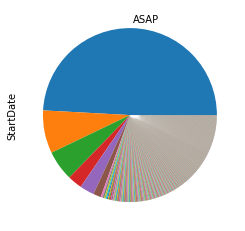

In [394]:
%matplotlib inline
import numpy as np
labels = np.full(len(df.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df.StartDate.value_counts().plot(kind="pie", labels=labels)
#it was copy labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
# it was copy df_clean.StartDate.value_counts().plot(kind="pie")